In [1]:
import scipy.io
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
f = scipy.io.loadmat('/Users/francescacossu/Downloads/flow.mat')["flow"].reshape(28,)
C= scipy.io.loadmat('/Users/francescacossu/Downloads/capacities.mat')["capacities"].reshape(28,)
B = scipy.io.loadmat('/Users/francescacossu/Downloads/traffic.mat')["traffic"]
l = scipy.io.loadmat('/Users/francescacossu/Downloads/traveltime.mat')["traveltime"].reshape(28,)

In [3]:
n_edges = B.shape[1]
n_edges

28

__**Question a**__

Given a multigraph $(V,E)$, an **exogenous network flow** is a vector ${\nu} \in \mathrm{R}^V$ such that

\begin{equation}
	\sum_{i \in V} \nu_i = 0.
\end{equation}

A network flow is a vector $f \in \mathrm{R}^E$ satisfying a positivity constraint and a mass conservation constraints, i.e.,

\begin{equation}
 f \ge \mathbf{0}, \quad Bf = \nu.
\end{equation}

Every edge is endowed with a separable non-decreasing convex cost function $\psi_e(f_e)$ such that $\psi_e(0)=0$. 

Given an exogenous flow $\nu$ and a network with node-edge matrix $B$, we study the following optimization problem:

\begin{equation}
\begin{aligned}
	f^* \in \ & \underset{\substack{f \in \mathrm{R}^{E}_+ \\ B f = \nu}}{\arg\min}
	& & \sum_{e \in E} \psi_e (f_e).
\end{aligned}
\end{equation}

The ratio $\psi_e(f_e) / f_e$ may be interpreted as the cost per unit of flow sent along the edge $e$. The convexity of $\psi_e(f_e)$ is thus equivalent to requiring that the marginal cost for sending some flow on each edge is non-decreasing in the flow itself.

In this case 

In [4]:
tau = 1
nu = np.zeros(B.shape[0])
nu[0] = 1
nu[-1] = -1

In [5]:
n_edges = B.shape[1]
nu = np.zeros(B.shape[0])
nu[0] = 1
nu[-1] = -1
unit_flow = cp.Variable(n_edges)
objective = cp.Minimize(l.T @ unit_flow)
constraints = [B @ unit_flow == nu, unit_flow>=0]
prob = cp.Problem(objective, constraints)
flow_cost = prob.solve()

flow = np.isclose(unit_flow.value,1).astype(int)

I use network flow optimization to find the shortest path between node 1 and 17, the equivalent to the fastest path in an empty network

In [6]:
unit_flow = cp.Variable(n_edges)
objective = cp.Minimize(l.T @ unit_flow)
constraints = [B @ unit_flow == nu, unit_flow>=0]
prob = cp.Problem(objective, constraints)
flow_cost = prob.solve()



In [7]:
unit_flow.value

array([1.00000000e+00, 1.00000000e+00, 1.19595586e-11, 5.07129566e-12,
       1.49988426e-10, 1.33658919e-10, 8.54100951e-11, 3.78266693e-11,
       9.99999998e-01, 8.90389208e-12, 3.91753215e-11, 1.00000000e+00,
       6.88981434e-12, 5.07752202e-12, 1.62878397e-11, 5.42208640e-11,
       1.91831469e-11, 5.71274798e-11, 8.67469798e-11, 1.99611946e-09,
       1.29358670e-10, 2.12547935e-09, 4.14939343e-11, 1.16133834e-11,
       1.00000000e+00, 4.65871714e-11, 3.08330688e-11, 3.08494486e-11])

In [12]:
unit_flow = cp.Variable(n_edges)
objective = cp.Minimize(l.T @ unit_flow)
constraints = [B @ unit_flow == nu, unit_flow >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.
print('Optimal f:', unit_flow.value)

Optimal f: [1.00000000e+00 1.00000000e+00 1.19595586e-11 5.07129566e-12
 1.49988426e-10 1.33658919e-10 8.54100951e-11 3.78266693e-11
 9.99999998e-01 8.90389208e-12 3.91753215e-11 1.00000000e+00
 6.88981434e-12 5.07752202e-12 1.62878397e-11 5.42208640e-11
 1.91831469e-11 5.71274798e-11 8.67469798e-11 1.99611946e-09
 1.29358670e-10 2.12547935e-09 4.14939343e-11 1.16133834e-11
 1.00000000e+00 4.65871714e-11 3.08330688e-11 3.08494486e-11]


In [13]:
#In this part of code I define the graph starting from the incidence matrix B
def from_incidence(B):
    edge_list = []
    for j in range(B.shape[1]):
        for i in range(B.shape[0]):
            if B[i][j] > 0:
                head = i+1
            if B[i][j] < 0:
                edge_list.append((head, i+1))

    return edge_list
edges = from_incidence(B)
G = nx.DiGraph()
G.add_edges_from(edges)

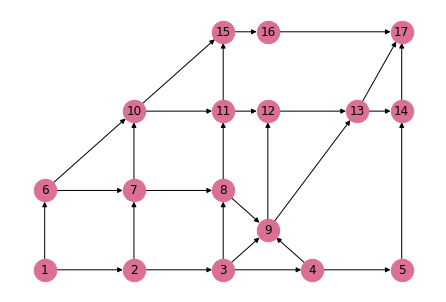

In [17]:
pos = {
    1: [0,0],
    2: [2,0],
    3: [4,0],
    4: [6,0],
    5: [8,0],
    6: [0,2],
    7: [2,2],
    8: [4,2],
    9: [5,1],
    10:[2,4],
    11: [4,4],
    12: [5,4],
    13: [7,4],
    14: [8,4],
    15: [4,6],
    16: [5,6],
    17: [8,6]
    
}
nx.draw(G, pos,node_color = 'palevioletred', node_size = 500, with_labels = True)
plt.savefig('ex30.svg')

In [18]:
G.edges()

OutEdgeView([(1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (3, 9), (4, 5), (4, 9), (5, 14), (6, 7), (6, 10), (7, 8), (7, 10), (8, 9), (8, 11), (9, 13), (9, 12), (13, 14), (13, 17), (14, 17), (10, 11), (10, 15), (11, 12), (11, 15), (15, 16), (12, 13), (16, 17)])

In [19]:
color_list = ['crimson','black','crimson','black','black','black',
              'crimson','black','black','black','black','black',
              'black','black','black','black','crimson','black',
              'black','crimson','black','black','black','black',
              'black','black','black','black',]

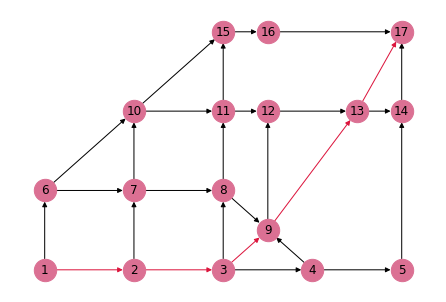

In [21]:

nx.draw(G, pos,edge_color = color_list, node_color = 'palevioletred', node_size = 500, with_labels = True)
plt.savefig('ex31.svg')

**Question b**

In [ ]:
def set_capacities(G, c):
    for i, edge in enumerate(G.edges):
        G[edge[0]][edge[1]]['capacity'] = c[i]

In [ ]:
set_capacities(G, C)

In [ ]:
max_flow = nx.maximum_flow_value(G,1, 17)
max_flow

**Question c**

The external inflow is simply obtained by doing the matrix multiplication between the node-link incidence matrix and the network flow vector

In [ ]:
nu = B @ f
nu

In [ ]:

new_nu = np.zeros(len(nu))
new_nu[0] = nu[0]
new_nu[-1] = -nu[0]
nu = new_nu

In [ ]:
nu

**Question d**

In [ ]:
fstar = cp.Variable(n_edges)
fun = cp.multiply(cp.multiply(l,C), cp.inv_pos(1-cp.multiply(fstar,cp.inv_pos(C)))) - cp.multiply(l,C)
objective = cp.Minimize(cp.sum(fun))
constraints = [B @ fstar == nu, fstar >=0]
prob = cp.Problem(objective, constraints)
opt_cos = prob.solve()
fstar.value, opt_cos

**Question e**

The wardrop equilibrium is a path flow distribution such that if path p is used, then the cost of the path is minimal.
We say that $f$ is a Wardrop equilibrium if it is induced by a Wardrop equilibrium $z$ via $f=Az$.
$f^{(0)}$ is a Wardrop equilibrium if and only if it is solution of a network flow optimization given that the cost functions $\psi_e(f_e)$ are chosen as

$$
\psi_e(f_e) = \int_0^{f_e} d_e(s)~\mathrm{d}s.
$$
For our problem, the objective function is:
\begin{gather*}
\sum _{e\epsilon \varepsilon } \int_{0}^{f_{e}}\tau _{e}(s)ds
\end{gather*}

In [ ]:
fwar = cp.Variable(n_edges)
delay_func_int  = cp.multiply(-cp.multiply(C, l), cp.log( 1 - cp.multiply(fwar, cp.inv_pos(C))))
objective = cp.Minimize(cp.sum(delay_func_int))
constraints = [B@fwar == nu, fwar>=0]
prob = cp.Problem(objective, constraints)
war_eq = prob.solve()
fwar.value, war_eq

In [ ]:
def cost(f):
    return sum(f*l/(1-f/C))

cost_w = cost(fwar.value)
cost_w

In [ ]:
fwt = cp.Variable(n_edges)
w = fstar.value * C*l /(C- fstar.value)**2        #C*l/(C-fstar)^2
new_delay = cp.multiply(-cp.multiply(C, l), cp.log( 1 - cp.multiply(fwt, cp.inv_pos(C)))) + cp.multiply(fwt, w)
objective = cp.Minimize(cp.sum(new_delay))
constraints = [B@fwt==nu, fwt>=0]
prob = cp.Problem(objective, constraints)
war_toll = prob.solve()

fwt.value, war_toll

In [ ]:
cost_wt = cost(fwt.value)
cost_wt

**Question f**

In [ ]:
f_new = cp.Variable(n_edges)
new_cost_func = cp.multiply(cp.multiply(l,C), cp.inv_pos(1-cp.multiply(f_new,cp.inv_pos(C)))) - cp.multiply(l,C)
   #cp.multiply(f_new, cp.multiply(l,cp.inv_pos( 1 - cp.multiply(f_new, cp.inv_pos(C)))) - l)
objective = cp.Minimize(cp.sum(new_cost_func - cp.multiply(f_new,l)))
constraints = [B@f_new==nu, f_new>=0]
prob = cp.Problem(objective, constraints)
new_soc_opt = prob.solve()

new_soc_opt, f_new.value
new_opt_cost = cost(f_new.value)
new_opt_cost
f_s = f_new.value
#f_s = cp.Variable(n_edges)
w_s = ( -f_s * l *(f_s - 2*C) / (f_s - C)**2 ) - l/(1- f_s/C)
f_new_war = cp.Variable(n_edges)
tau = cp.multiply(l, cp.inv_pos(1 - cp.multiply(f_new_war, cp.inv_pos(C)))) #tau delay function
fun = cp.multiply(-cp.multiply(C, l), cp.log( 1 - cp.multiply(f_new_war, cp.inv_pos(C)))) + cp.multiply(f_new_war, w_s)
objective = cp.Minimize(
    cp.sum(fun)
)
constraints = [B@f_new_war==nu, f_new_war>=0]
prob = cp.Problem(objective, constraints)
fin_sol = prob.solve()
f_new_war.value, fin_sol
cost(f_new_war.value)